In [5]:
%matplotlib widget
import importlib
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append("..")       # to make the upper folder visible
import src
_ = importlib.reload(src)   # this make changes in the src package immediately effective without restarting the kernel

# folder path
dirPath = "../data/raw/1st_test_IMSBearing/"
fileName = "2003.10.22.12.09.13"

snap1=src.data.snapshot()
snap1.readImsFile(path=dirPath+fileName, variables="Bearing 1 x")

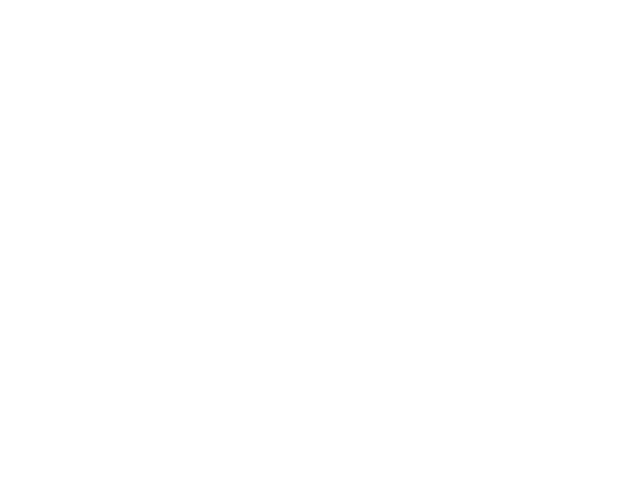

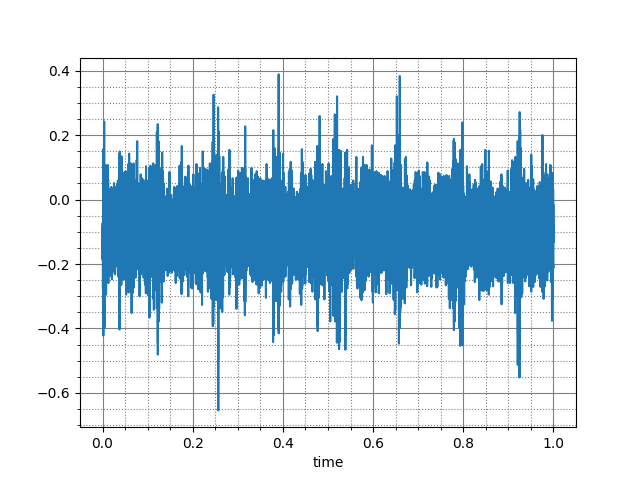

In [6]:
plt.figure(clear=True)
ax=snap1.rawData.plot(x='time',y='Bearing 1 x',legend=False)
ax.grid(which='major',axis='both',color='grey', linestyle='-')
ax.grid(which='minor',axis='both',color='grey', linestyle=':')
ax.minorticks_on()

<bound method _AxesBase.get_xticks of <Axes: >>


Text(0, 0.5, 'amplitude')

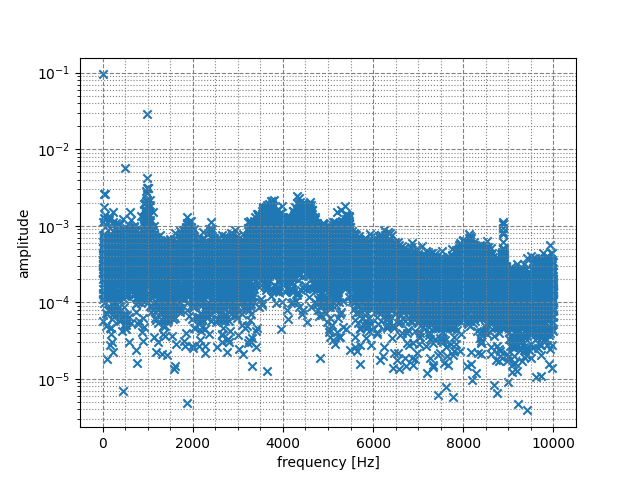

In [7]:
plt.figure(clear=True)
# Frequency domain representation
samplFreq=20000 #hz
y=snap1.rawData["Bearing 1 x"].to_numpy()
tpCount     = len(y)
fourierTransform = np.fft.fft(y)/len(y)                         # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(y)/2))]       # Exclude sampling frequency
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplFreq
FFTfrequencies = values/timePeriod

# Frequency domain representation
ax2=plt.subplot()
ax2.scatter(FFTfrequencies,abs(fourierTransform),marker='x')
ax2.minorticks_on()
#ax1.set_xlim(0,3)
#ax2.set_xlim(1,20)
ax2.set_yscale('log')
ax2.grid(which='major',color='grey',linestyle='--')
ax2.grid(which='minor',color='grey',linestyle=':')
print(ax2.get_xticks)
ax2.set_xlabel("frequency [Hz]")
ax2.set_ylabel("amplitude")